**Name: Gayatri Rajendra Mene**

**PRN: 202201070005**

**Branch: ENTC**


## **Implementation of Logistic Regression from Scratch**

Logistic Regression is a statistical method used for binary classification, where the output is either 0 or 1. It applies the sigmoid function to map linear predictions to probabilities, helping in decision-making. It is widely used in applications like spam detection, disease prediction, and credit scoring.

Final Weights: [ 2.96446773 -4.83807688]
Final Bias: -0.7914707447762322
Model Accuracy: 99.33%


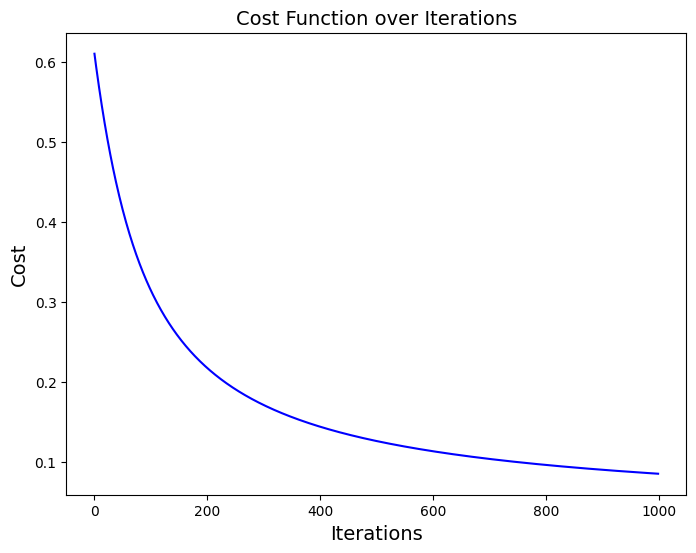

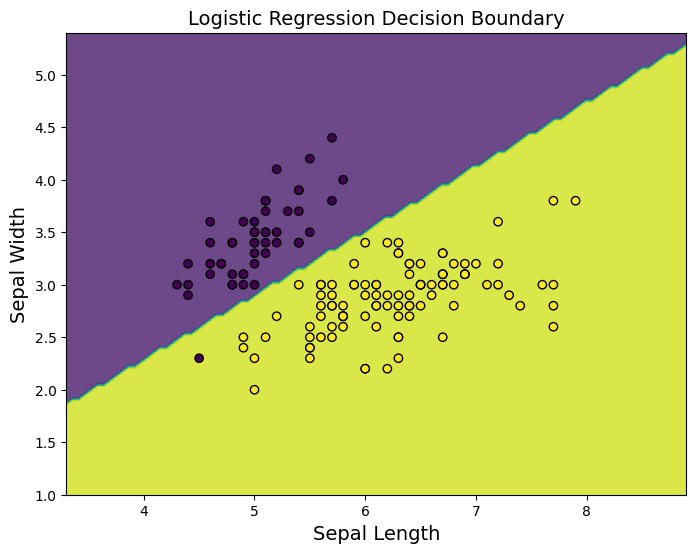

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take only the first two features (Sepal Length & Sepal Width)
y = (iris.target != 0).astype(int)  # Convert to binary classification (Setosa vs. Versicolor)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (Log Loss)
def compute_cost(X, y, w, b):
    m = len(y)
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)

    # Log loss function
    cost = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

# Compute gradients for gradient descent
def compute_gradients(X, y, w, b):
    m = len(y)
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)

    dw = (1 / m) * np.dot(X.T, (y_pred - y))
    db = (1 / m) * np.sum(y_pred - y)

    return dw, db

# Gradient Descent for Logistic Regression
def gradient_descent(X, y, w, b, learning_rate, iterations):
    cost_history = []

    for _ in range(iterations):
        dw, db = compute_gradients(X, y, w, b)

        # Update weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db

        # Compute cost after updating
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)

    return w, b, cost_history

# Prediction function
def predict(X, w, b):
    z = np.dot(X, w) + b
    return (sigmoid(z) >= 0.5).astype(int)

# Accuracy calculation function
def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100  # Percentage accuracy

# Train Logistic Regression Model
w = np.zeros(X.shape[1])  # Initialize weights
b = 0                     # Initialize bias
learning_rate = 0.1
iterations = 1000

w, b, cost_history = gradient_descent(X, y, w, b, learning_rate, iterations)

# Get predictions
y_pred = predict(X, w, b)

# Compute accuracy
accuracy = compute_accuracy(y, y_pred)

# Print Final Weights, Bias, and Accuracy
print(f"Final Weights: {w}")
print(f"Final Bias: {b}")
print(f"Model Accuracy: {accuracy:.2f}%")

# Plot Cost Function
plt.figure(figsize=(8, 6))
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost Function over Iterations", fontsize=14)
plt.show()

# Decision Boundary Plot
def plot_decision_boundary(X, y, w, b):
    plt.figure(figsize=(8, 6))

    # Create a grid of values for plotting decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = predict(np.c_[xx.ravel(), yy.ravel()], w, b)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

    # Scatter plot of data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='viridis')

    plt.xlabel('Sepal Length', fontsize=14)
    plt.ylabel('Sepal Width', fontsize=14)
    plt.title("Logistic Regression Decision Boundary", fontsize=14)
    plt.show()

# Plot the Decision Boundary
plot_decision_boundary(X, y, w, b)


## **Implementation of Logistic Regression with Library**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.97
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



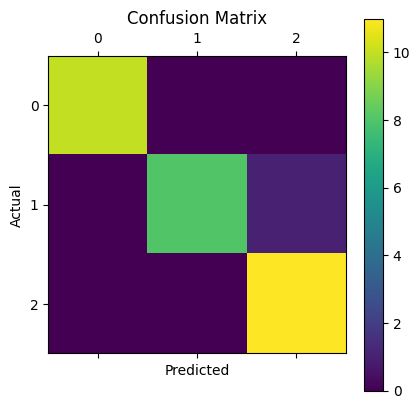

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (class labels)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

# Plot confusion matrix
plt.matshow(conf_matrix, cmap='viridis')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Activation Functions**

### Sigmoid Function

The sigmoid activation function maps any input value to a range between 0 and 1, making it useful for binary classification problems. It is defined as σ(x) = 1 / (1 + e^(-x)), where larger inputs approach 1 and smaller inputs approach 0. However, it can suffer from issues like vanishing gradients in deep networks.

In [ ]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
sigmoid(100)

1.0

In [ ]:
sigmoid(-10)

4.5397868702434395e-05

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sigmoid():
    x = np.linspace(-10, 10, 100)
    y = 1 / (1 + np.exp(-x))

    plt.plot(x, y)
    plt.xlabel('Input')
    plt.ylabel('Sigmoid Output')
    plt.title('Sigmoid Activation Function')
    plt.grid(True)
    plt.show()

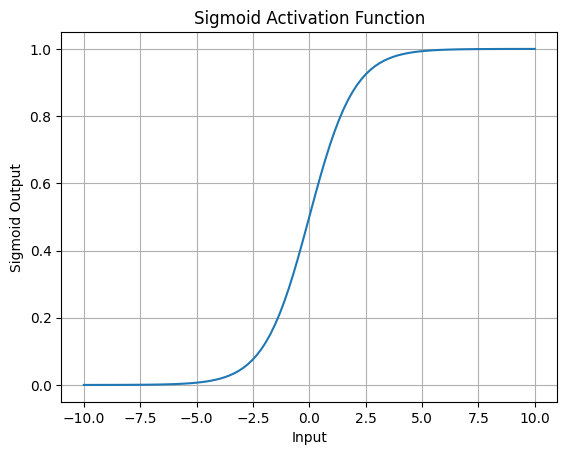

In [ ]:
plot_sigmoid()

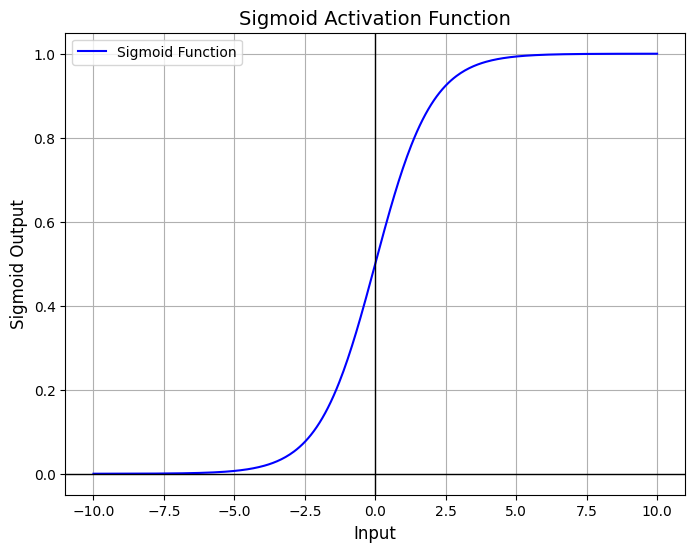

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a range of values
x_values = np.linspace(-10, 10, 400)

# Apply sigmoid function
y_values = sigmoid(x_values)

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Sigmoid Function', color='blue')
plt.title("Sigmoid Activation Function", fontsize=14)
plt.xlabel('Input', fontsize=12)
plt.ylabel('Sigmoid Output', fontsize=12)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.legend()
plt.show()


### Tanh Function

The tanh (hyperbolic tangent) activation function maps input values to a range between -1 and 1, making it zero-centered. It is defined as tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x)). Compared to the sigmoid function, tanh provides stronger gradients but still suffers from the vanishing gradient problem for very large or small inputs.

In [ ]:
def tanh(x):
  return (math.exp(x)-math.exp(-x))/(math.exp(x)+math.exp(-x))

In [ ]:
tanh(-43)

-1.0

In [ ]:
tanh(1)

0.7615941559557649

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_tanh():

    x = np.linspace(-10, 10, 100)

    tanh = np.tanh(x)

    plt.plot(x, tanh)
    plt.title("Hyperbolic Tangent (tanh) Activation Function")
    plt.xlabel("x")
    plt.ylabel("tanh(x)")
    plt.grid(True)
    plt.show()

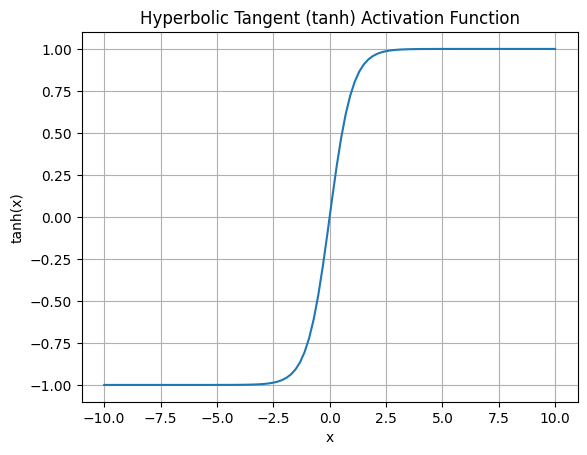

In [ ]:
plot_tanh()

### ReLU Functiuon

The ReLU activation function is defined as ReLU(x) = max(0, x), meaning it outputs 0 for negative values and x for positive values. It helps mitigate the vanishing gradient problem, making it popular in deep learning. However, it can suffer from the "dying ReLU" problem, where neurons can become inactive if they always output zero.

In [ ]:
def relu(x):
  return max(0,x)

In [ ]:
relu(-10)

0

In [ ]:
relu(5)

5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_relu():

    x = np.linspace(-10, 10, 100)

    relu = np.maximum(0, x)

    plt.plot(x, relu)
    plt.title("ReLU Activation Function")
    plt.xlabel("x")
    plt.ylabel("ReLU(x)")
    plt.grid(True)
    plt.show()

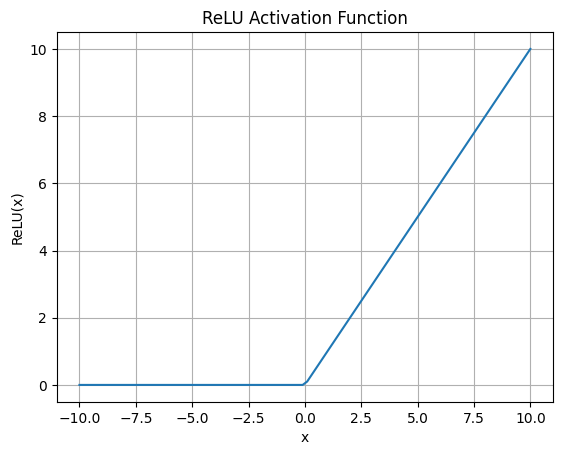

In [ ]:
plot_relu()

## **Log Loss Function**

**Log Loss (Logarithmic Loss)** is a metric used to evaluate the performance of classification models, especially in probabilistic predictions. It measures how well a model’s predicted probabilities match the actual class labels, with lower values indicating better predictions. Incorrect predictions with high confidence are penalized more heavily, making log loss a strict evaluation metric for classification tasks.

In [ ]:
# Log loss
def log_loss(y, y_dash):
    """Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y      (scalar): true value (0 or 1)
      y_dash (scalar): predicted value (probability of y being 1)
    Returns:
      loss (float): nonnegative loss corresponding to y and y_dash
    """
    loss = - (y * np.log(y_dash)) - ((1 - y) * np.log(1 - y_dash))
    return loss

y, y_dash = 0, 0.6
print(f"log_loss({y}, {y_dash}) = {log_loss(y, y_dash)}")
y, y_dash = 1, 0.4
print(f"log_loss({y}, {y_dash}) = {log_loss(y, y_dash)}")
y, y_dash = 1, 0.8
print(f"log_loss({y}, {y_dash}) = {log_loss(y, y_dash)}")
y, y_dash = 0, 0.2
print(f"log_loss({y}, {y_dash}) = {log_loss(y, y_dash)}")

log_loss(0, 0.6) = 0.916290731874155
log_loss(1, 0.4) = 0.916290731874155
log_loss(1, 0.8) = 0.2231435513142097
log_loss(0, 0.2) = 0.2231435513142097


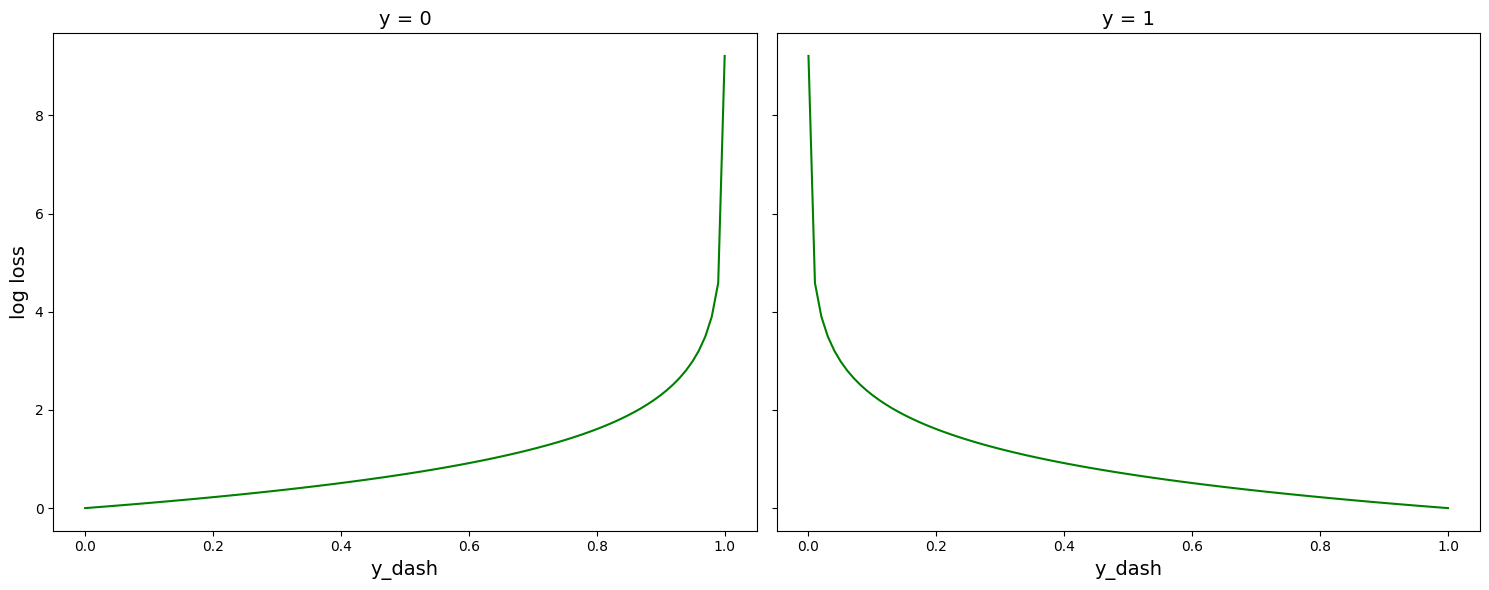

In [ ]:
# Log loss for y = 0 and y = 1
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
y_dash = np.linspace(0.0001, 0.9999, 100)
ax[0].plot(y_dash, log_loss(0, y_dash), color = 'green')
ax[0].set_title("y = 0", fontsize = 14)
ax[0].set_xlabel("y_dash", fontsize = 14)
ax[0].set_ylabel("log loss", fontsize = 14)
ax[1].plot(y_dash, log_loss(1, y_dash), color = 'green')
ax[1].set_title("y = 1", fontsize = 14)
ax[1].set_xlabel("y_dash", fontsize = 14)
plt.tight_layout()
plt.show()

## **Sklearn Implementation of MultiLayer Perceptron(MLP)**

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



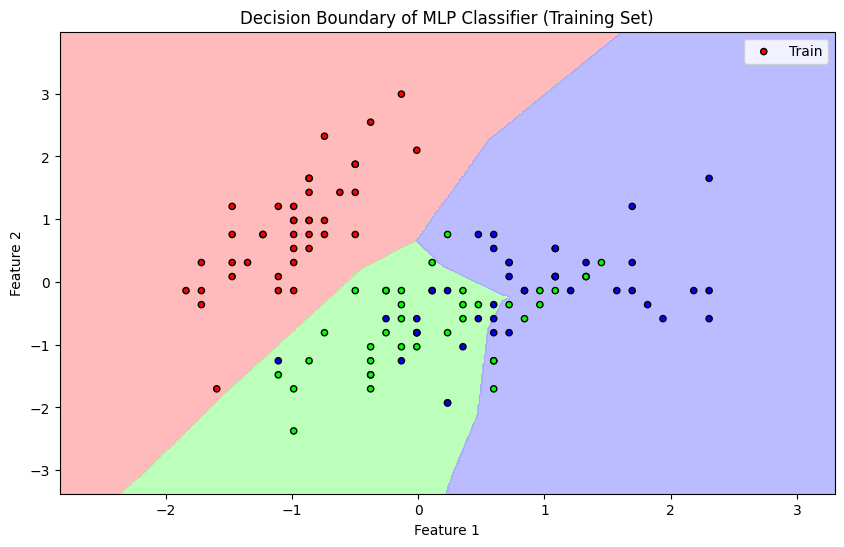

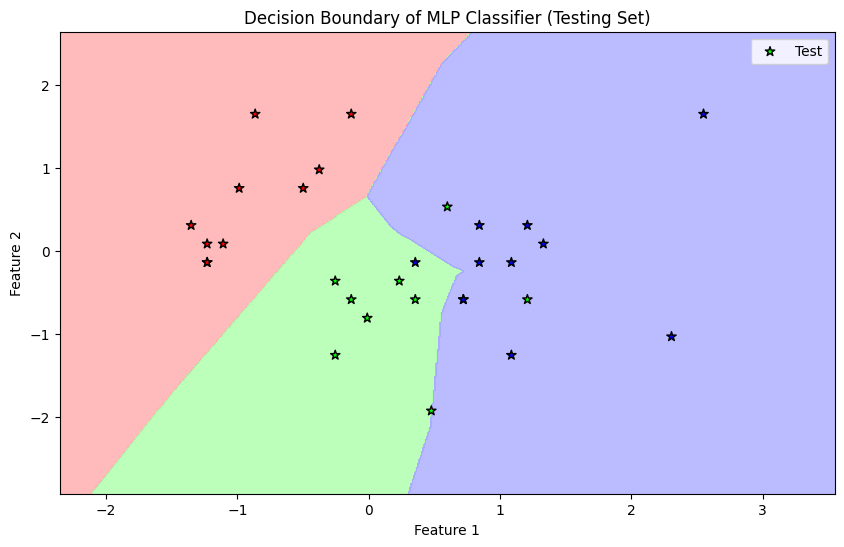

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the Iris dataset
data = load_iris()
X = data.data[:, :2]  # Use the first two features for 2D visualization
y = data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# Train the MLP classifier
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot decision boundaries for training set
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_train = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z_train = Z_train.reshape(xx.shape)

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_train, alpha=0.8, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Train')
plt.title("Decision Boundary of MLP Classifier (Training Set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Plot decision boundaries for testing set
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_test = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z_test = Z_test.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_test, alpha=0.8, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, label='Test', marker='*')
plt.title("Decision Boundary of MLP Classifier (Testing Set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## **Keras Implementation of MultiLayer Perceptron(MLP)**

**Keras** is an open-source deep learning framework that provides a user-friendly API for building and training neural networks. It is built on top of **TensorFlow** and supports both convolutional and recurrent networks, making it widely used for AI and machine learning applications. Keras is known for its simplicity, modularity, and ease of experimentation, making it ideal for beginners and professionals alike.

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4805 - loss: 0.8702 - val_accuracy: 0.5188 - val_loss: 0.7728
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5729 - loss: 0.7015 - val_accuracy: 0.6000 - val_loss: 0.6822
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6725 - loss: 0.6344 - val_accuracy: 0.6750 - val_loss: 0.6320
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7252 - loss: 0.5896 - val_accuracy: 0.7563 - val_loss: 0.5888
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7893 - loss: 0.5392 - val_accuracy: 0.7812 - val_loss: 0.5472
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8094 - loss: 0.4927 - val_accuracy: 0.7875 - val_loss: 0.5069
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8346 - loss: 0.4372 - val_accuracy: 0.8062 - val_loss: 0.4657
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8566 - loss: 0.4046 - val_accuracy: 0.8188 - val_loss: 0.4305
Ep

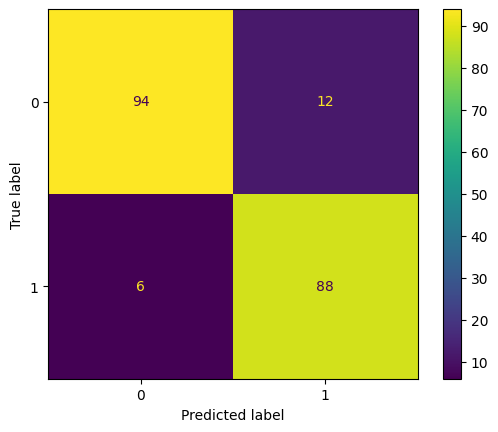

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Step 1: Prepare a synthetic dataset
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42
)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (helps with convergence and performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit the scaler on training data and transform it
X_test = scaler.transform(X_test)  # Transform the testing data using the same scaler

# Step 2: Build the ANN model
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),  # Hidden layer with 32 neurons and ReLU activation
    Dense(16, activation='relu'),  # Another hidden layer with 16 neurons and ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation for binary classification
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Step 6: Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Step 7: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Visualize confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## **Backward Propogation from Sratch**

Final Output: [0.06389456919363436, 0.9404153154587165]


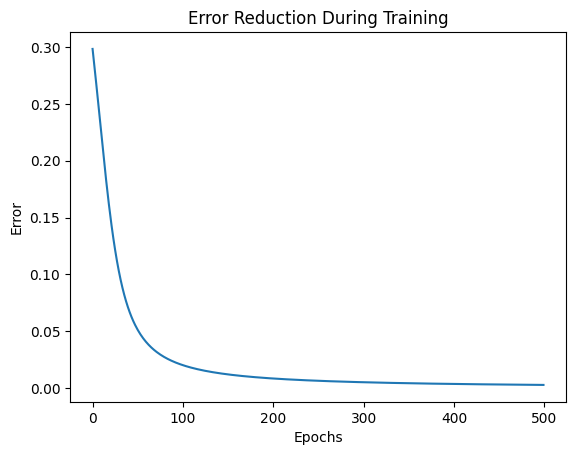

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Derivative of Sigmoid Function
def sigmoid_derivative(x):
    return x * (1 - x)

# Feedforward function
def feed_forward(b1, b2, w1, w2, x):
    hidden = []
    output = []

    # Hidden Layer Activation
    hidden.append(sigmoid(b1 + w1[0] * x[0] + w1[1] * x[1]))
    hidden.append(sigmoid(b1 + w1[2] * x[0] + w1[3] * x[1]))

    # Output Layer Activation
    output.append(sigmoid(b2 + w2[0] * hidden[0] + w2[1] * hidden[1]))
    output.append(sigmoid(b2 + w2[2] * hidden[0] + w2[3] * hidden[1]))

    return hidden, output

# Error Calculation
def find_error(output, desired):
    return sum((np.array(output) - np.array(desired))**2) / 2

# Backpropagation
def back_propagate(w1, w2, hidden, output, desired, x, alpha):
    # Compute error terms for output layer
    delta_output = [(output[i] - desired[i]) * sigmoid_derivative(output[i]) for i in range(len(output))]

    # Compute error terms for hidden layer
    delta_hidden = []
    for i in range(2):
        temp = sum(delta_output[j] * w2[i + j * 2] for j in range(2))
        delta_hidden.append(temp * sigmoid_derivative(hidden[i]))

    # Update weights for hidden-to-output layer
    for i in range(len(w2)):
        w2[i] -= alpha * delta_output[i // 2] * hidden[i % 2]

    # Update weights for input-to-hidden layer
    for i in range(len(w1)):
        w1[i] -= alpha * delta_hidden[i // 2] * x[i % 2]

# Initialization
w1 = [0.15, 0.20, 0.25, 0.30]  # Weights for input to hidden layer
w2 = [0.40, 0.45, 0.50, 0.55]  # Weights for hidden to output layer
x = [0.05, 0.10]  # Input values
b1 = 0.35  # Bias for hidden layer
b2 = 0.60  # Bias for output layer
desired = [0.01, 0.99]  # Desired output
epochs = 500  # Training iterations
alpha = 0.5  # Learning rate
error = []

# Training Loop
for _ in range(epochs):
    hidden, output = feed_forward(b1, b2, w1, w2, x)
    error.append(find_error(output, desired))
    back_propagate(w1, w2, hidden, output, desired, x, alpha)

# Final Output after Training
print("Final Output:", output)

# Plot Error Reduction Over Time
plt.plot(error)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error Reduction During Training")
plt.show()

